### Network Analysis

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
% matplotlib inline
import random as rn

In [141]:
import community as community
from multiprocessing import Pool
import itertools

In [142]:
clrs = ('blue','red','green','cyan','magenta')
clrs[rn.randint(0,len(clrs)-1)]

'magenta'

---------

In [2]:
with open('nodes.json', 'r') as f:
     Nodes = json.load(f)

In [3]:
with open('edges.json', 'r') as f:
     Edges = json.load(f)

---------

In [4]:
nodedf = pd.DataFrame(Nodes)
edgedf = pd.DataFrame(Edges)

-------

### Network

In [5]:
import networkx as nx

In [205]:
G = nx.DiGraph()

--------

##### Nodes

In [206]:
for item in Nodes:
    #print(item)
    G.add_node(item['id'],\
               typ = item['type'],\
               name = item['name'],\
               group = item['group'])

--------

##### Edges

In [207]:
for item in Edges:
    #print(item)
    G.add_edge(item['source'],item['target'],\
               color =  clrs[rn.randint(0,len(clrs)-1)],\
               weight = item['value']) 
    

In [298]:
for n1,n2,attr in G.edges(data=True): 
     print(n1,n2,attr['weight'])

E22 E21 5
E20 E27 8
E20 E28 8
E20 E26 8
E20 E21 8
E19 E27 8
E19 E28 8
E19 E20 8
E19 E26 8
E19 E21 8
E34 E35 8
T177 E111 4
E70 E113 3
T168 E105 4
T83 E51 4
E37 E49 8
E37 E46 8
E37 E40 8
E37 E44 8
E37 E41 8
E37 E45 8
E37 E42 8
E37 E39 8
E37 E47 8
E37 E50 8
E37 E38 8
E36 E49 8
E36 E46 8
E36 E38 8
E36 E41 8
E36 E42 8
E36 E39 8
E36 E50 8
E36 E40 8
E36 E44 8
E36 E45 8
E36 E47 8
E36 E37 8
E41 E49 8
E41 E46 8
E41 E50 8
E41 E45 8
E41 E42 8
E41 E47 8
E41 E44 8
E33 E34 3
T107 E64 4
E56 E63 8
E56 E61 8
E56 E66 8
E56 E65 8
E56 E68 8
E56 E57 8
E56 E58 8
E56 E70 8
E56 E62 8
E56 E67 8
E56 E59 8
E56 E60 8
E56 E69 8
T32 E22 4
E86 E89 8
E86 E87 8
E86 E88 8
E57 E63 8
E57 E66 8
E57 E65 8
E57 E68 8
E57 E61 8
E57 E58 8
E57 E70 8
E57 E62 8
E57 E67 8
E57 E59 8
E57 E60 8
E57 E69 8
E102 E106 8
E102 E105 8
T101 E61 4
T13 E7 4
E78 E79 3
E3 E4 8
E3 E6 8
T169 E105 4
E63 E70 8
E63 E68 8
E63 E65 8
E63 E66 8
E63 E67 8
E63 E69 8
E91 E92 8
E91 E93 8
T73 T72 4
T87 E54 4
E11 E10 6
E89 E90 3
E4 E7 3
E73 E78 8
E73 E77 8
E25 

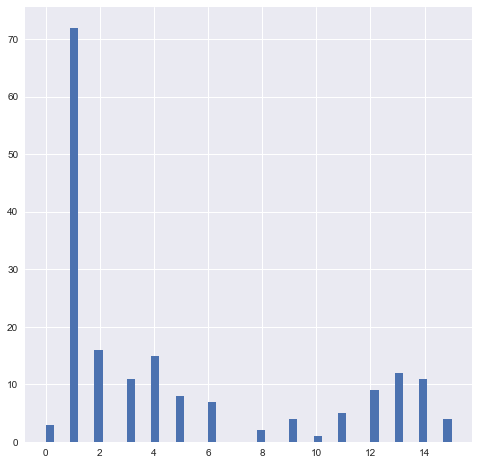

In [209]:
plt.figure(figsize =[8,8])
degreeL = []
for node in G.nodes():
        degreeL.append({'node':node,'degree':G.degree(node)})
        #print(node, G.degree(node))
degreedf = pd.DataFrame(degreeL)
degreedf['degree'].hist(bins =50)

--------

##### Plot

In [210]:
import matplotlib.pyplot as plt

In [211]:
options = {
     'node_color': 'cyan',
    'edge_color': 'blue',
     'node_size': 1000,
     'width': 0.01,
 }

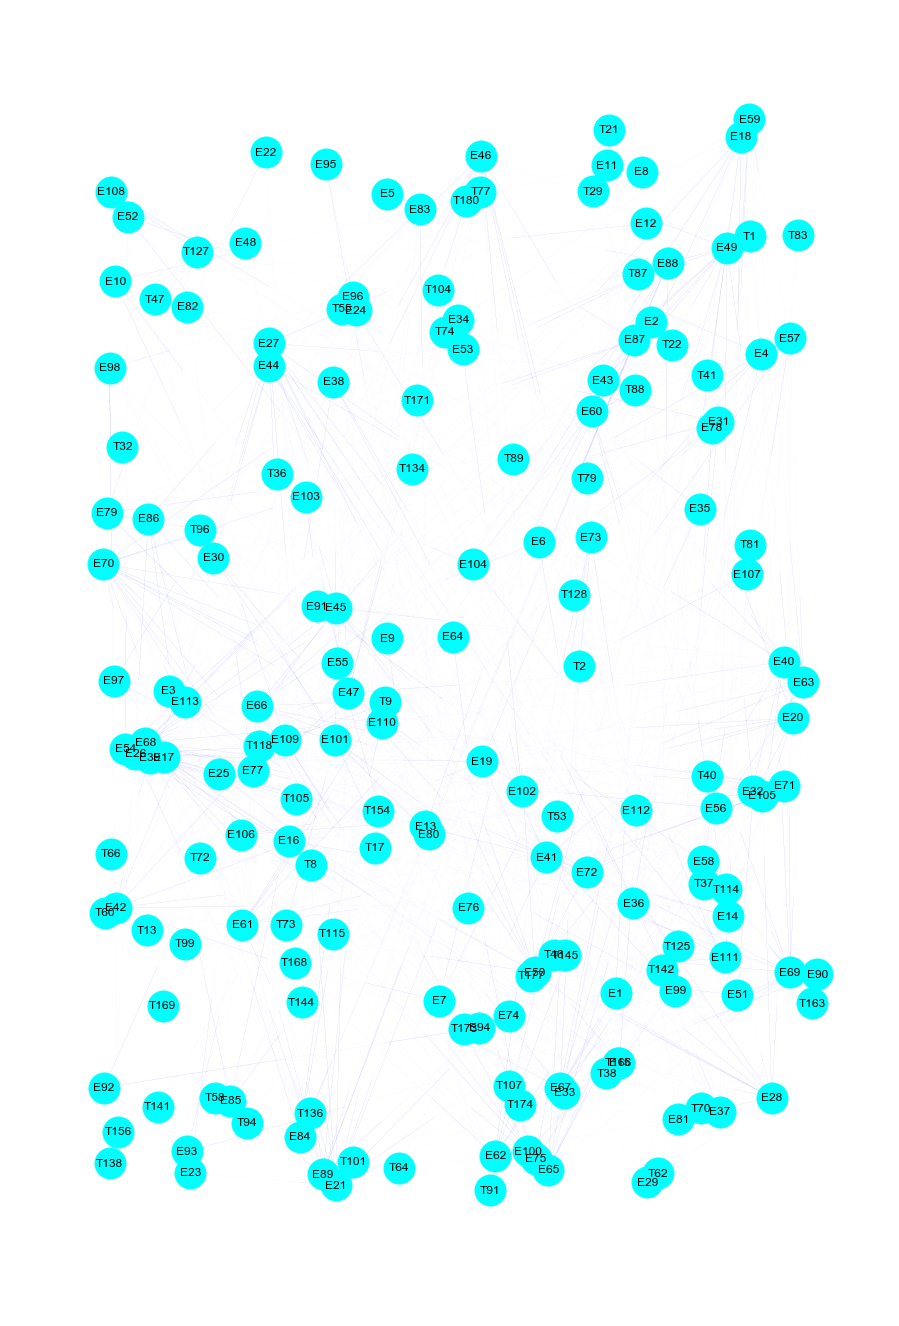

In [212]:
plt.figure(figsize=[12,18])
nx.draw_random(G,with_labels=True, **options)

### Analysis

In [215]:
N,K = G.order(),G.size()
avg_deg = float(K)/N
N,K,avg_deg

(180, 437, 2.4277777777777776)

In [297]:
G.in_degree()

InDegreeView({'E22': 1, 'E20': 8, 'E19': 6, 'E34': 1, 'T1': 0, 'E70': 14, 'T168': 0, 'T83': 0, 'E37': 1, 'E36': 2, 'E41': 6, 'E33': 1, 'T107': 0, 'E56': 1, 'T32': 0, 'E86': 6, 'E57': 2, 'E102': 2, 'T101': 0, 'T13': 0, 'E78': 3, 'E3': 1, 'T105': 0, 'E63': 9, 'E91': 1, 'T73': 1, 'T87': 0, 'E89': 10, 'E4': 5, 'E73': 4, 'E25': 1, 'E44': 7, 'E105': 3, 'E83': 2, 'T41': 0, 'E24': 1, 'E42': 8, 'E87': 6, 'E2': 0, 'T91': 0, 'T163': 0, 'E99': 3, 'T55': 0, 'T171': 0, 'E69': 13, 'E16': 3, 'E95': 1, 'T136': 0, 'E110': 2, 'T60': 0, 'E39': 4, 'E84': 5, 'T81': 0, 'E18': 5, 'T72': 1, 'T94': 0, 'E103': 1, 'E65': 8, 'T174': 0, 'T125': 0, 'E29': 1, 'T29': 0, 'T154': 0, 'T141': 0, 'E85': 4, 'E51': 3, 'E106': 3, 'T166': 0, 'E15': 3, 'T17': 0, 'E8': 0, 'E100': 4, 'E96': 1, 'E17': 4, 'E5': 0, 'T79': 0, 'E10': 3, 'T22': 0, 'E77': 2, 'T38': 0, 'E55': 1, 'E81': 0, 'E45': 8, 'T180': 0, 'E79': 4, 'E88': 9, 'E61': 7, 'E66': 9, 'T36': 0, 'E53': 0, 'T9': 0, 'T8': 0, 'E80': 1, 'T118': 0, 'T177': 0, 'E113': 1, 'T169': 0

In [245]:
G.out_degree()

OutDegreeView({'E22': 1, 'E20': 4, 'E19': 5, 'E34': 1, 'T1': 0, 'E70': 1, 'T168': 1, 'T83': 1, 'E37': 11, 'E36': 12, 'E41': 7, 'E33': 1, 'T107': 1, 'E56': 13, 'T32': 1, 'E86': 3, 'E57': 12, 'E102': 2, 'T101': 1, 'T13': 1, 'E78': 1, 'E3': 2, 'T105': 1, 'E63': 6, 'E91': 2, 'T73': 1, 'T87': 1, 'E89': 1, 'E4': 1, 'E73': 2, 'E25': 1, 'E44': 5, 'E105': 1, 'E83': 6, 'T41': 1, 'E24': 1, 'E42': 6, 'E87': 2, 'E2': 1, 'T91': 1, 'T163': 1, 'E99': 2, 'T55': 1, 'T171': 1, 'E69': 1, 'E16': 8, 'E95': 1, 'T136': 1, 'E110': 3, 'T60': 1, 'E39': 9, 'E84': 4, 'T81': 1, 'E18': 6, 'T72': 0, 'T94': 1, 'E103': 1, 'E65': 5, 'T174': 1, 'T125': 1, 'E29': 2, 'T29': 1, 'T154': 1, 'T141': 1, 'E85': 5, 'E51': 1, 'E106': 1, 'T166': 1, 'E15': 9, 'T17': 1, 'E8': 1, 'E100': 1, 'E96': 5, 'E17': 7, 'E5': 1, 'T79': 1, 'E10': 1, 'T22': 1, 'E77': 1, 'T38': 1, 'E55': 1, 'E81': 1, 'E45': 4, 'T180': 1, 'E79': 8, 'E88': 1, 'E61': 8, 'E66': 4, 'T36': 1, 'E53': 1, 'T9': 0, 'T8': 1, 'E80': 8, 'T118': 2, 'T177': 1, 'E113': 4, 'T169':

In [240]:
in_degrees = G.in_degree() # dictionary node:degree
in_values = sorted(set(dict(in_degrees).values()))
out_degrees = G.out_degree() # dictionary node:degree
out_values = sorted(set(dict(out_degrees).values()))

In [241]:
in_hist = [list(dict(in_degrees).values()).count(x) for x in in_values]
out_hist = [list(dict(out_degrees).values()).count(x) for x in out_values]

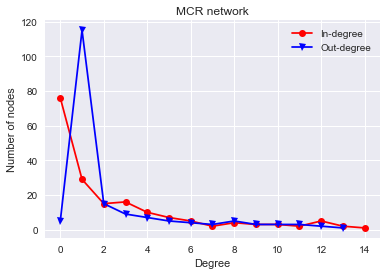

In [246]:
plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('MCR network')
plt.show()

In [247]:
gud = G.to_undirected()

In [254]:
ccs = nx.clustering(gud)

In [255]:
avg_clust = sum(ccs.values()) / len(ccs)

In [271]:
g_components = list(nx.connected_component_subgraphs(gud))

In [274]:
g_mc=g_components[0]
bet_cen = nx.betweenness_centrality(g_mc)
clo_cen = nx.closeness_centrality(g_mc)
eig_cen = nx.eigenvector_centrality(g_mc)

In [275]:
def highest_centrality(cent_dict):
    #Returns a tuple (node,value) with the node
    #with largest value from Networkx centrality dictionary

    # Create ordered tuple of centrality data
    cent_items=[(b,a) for (a,b) in cent_dict.iteritems()]
    # Sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

In [284]:
from scipy import polyfit

In [295]:
def centrality_scatter(dict1,dict2,path="",
                    ylab="",xlab="",title="",line=False):
    
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]

    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
    if line:
            # use NumPy to calculate the best fit
            slope, yint = polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')


    # Set new x- and y-axis limits
    
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

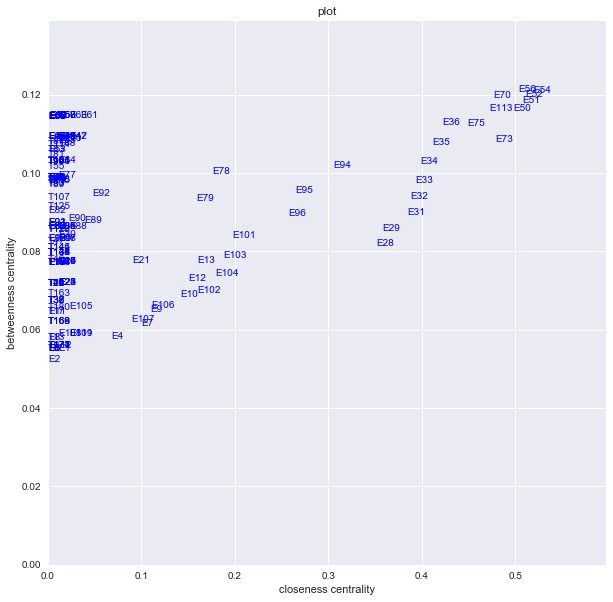

In [296]:
centrality_scatter(dict1=bet_cen,\
                   dict2=clo_cen,\
                   path="./",
                   ylab="betweenness centrality",\
                   xlab="closeness centrality",\
                   title="plot",\
                   line=False)

#### Rough

In [5]:
count = {}
for item in list(nodedf["type"]):
    count[item] = 0
for item in list(nodedf["type"]):
    count[item] = count[item] +1

In [63]:
cnt = []
for key,value in count.items():
    cnt.append({"label":key, "count": value})

In [65]:
countdf = pd.DataFrame(cnt)

In [69]:
countdf.to_csv("label_count.csv")

-------

#### References

1. https://www.cl.cam.ac.uk/~cm542/teaching/2011/stna-pdfs/stna-lecture11.pdf